##Problem Description
Implement GA to solve TSP. City distance matrix is given.Total number of cities is 17.

           distance_map = \
    [[0, 633, 257, 91, 412, 150, 80, 134, 259, 505, 353, 324, 70, 211, 268, 246, 121],
    [633, 0, 390, 661, 227, 488, 572, 530, 555, 289, 282, 638, 567, 466, 420, 745, 518],
    [257, 390, 0, 228, 169, 112, 196, 154, 372, 262, 110, 437, 191, 74, 53, 472, 142],
    [91, 661, 228, 0, 383, 120, 77, 105, 175, 476, 324, 240, 27, 182, 239, 237, 84],
    [412, 227, 169, 383, 0, 267, 351, 309, 338, 196, 61, 421, 346, 243, 199, 528, 297],
    [150, 488, 112, 120, 267, 0, 63, 34, 264, 360, 208, 329, 83, 105, 123, 364, 35],
    [80, 572, 196, 77, 351, 63, 0, 29, 232, 444, 292, 297, 47, 150, 207, 332, 29],
    [134, 530, 154, 105, 309, 34, 29, 0, 249, 402, 250, 314, 68, 108, 165, 349, 36],
    [259, 555, 372, 175, 338, 264, 232, 249, 0, 495, 352, 95, 189, 326, 383, 202, 236],
    [505, 289, 262, 476, 196, 360, 444, 402, 495, 0, 154, 578, 439, 336, 240, 685, 390],
    [353, 282, 110, 324, 61, 208, 292, 250, 352, 154, 0, 435, 287, 184, 140, 542, 238],
    [324, 638, 437, 240, 421, 329, 297, 314, 95, 578, 435, 0, 254, 391, 448, 157, 301],
    [70, 567, 191, 27, 346, 83, 47, 68, 189, 439, 287, 254, 0, 145, 202, 289, 55],
    [211, 466, 74, 182, 243, 105, 150, 108, 326, 336, 184, 391, 145, 0, 57, 426, 96],
    [268, 420, 53, 239, 199, 123, 207, 165, 383, 240, 140, 448, 202, 57, 0, 483, 153],
    [246, 745, 472, 237, 528, 364, 332, 349, 202, 685, 542, 157, 289, 426, 483, 0, 336],
    [121, 518, 142, 84, 297, 35, 29, 36, 236, 390, 238, 301, 55, 96, 153, 336, 0]]


------

-

##Implementation



 * Encoding

 Data structure used here is array of numbers, where numbers in array represnt the city.

 * Initial population

 intital population is generated by populating array with ramdom numbers from 0 - 16. While generating the population we make sure that cities are not repeated in an individual.

        sample individual = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]



* fitness function

  it is a minimisation problem as we are trying to minimise the travelling distance , while travelling all the cities.


-----
* mutation

Here, for mutation custom function is used. Bits are inverted at two random points in an array. here array repersents an individual.
function used is "mutate(individual)" , here individual is the population individual passed and resultant is mutated one.

* cross breeding

for breeding we have implemented function "breed(parent1, parent2)"
where each parent is passed and resultant is new child. while breeding we make sure that, cities are not repeated.

------

* Selection

for selection we have used both tournament and roulete wheel selection. 



-------


In [ ]:
import random
#from deap import creator, base, tools, algorithms
from random import randrange

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
import pandas as pd
%matplotlib inline

In [ ]:
distance_map = \
    [[0, 633, 257, 91, 412, 150, 80, 134, 259, 505, 353, 324, 70, 211, 268, 246, 121],
    [633, 0, 390, 661, 227, 488, 572, 530, 555, 289, 282, 638, 567, 466, 420, 745, 518],
    [257, 390, 0, 228, 169, 112, 196, 154, 372, 262, 110, 437, 191, 74, 53, 472, 142],
    [91, 661, 228, 0, 383, 120, 77, 105, 175, 476, 324, 240, 27, 182, 239, 237, 84],
    [412, 227, 169, 383, 0, 267, 351, 309, 338, 196, 61, 421, 346, 243, 199, 528, 297],
    [150, 488, 112, 120, 267, 0, 63, 34, 264, 360, 208, 329, 83, 105, 123, 364, 35],
    [80, 572, 196, 77, 351, 63, 0, 29, 232, 444, 292, 297, 47, 150, 207, 332, 29],
    [134, 530, 154, 105, 309, 34, 29, 0, 249, 402, 250, 314, 68, 108, 165, 349, 36],
    [259, 555, 372, 175, 338, 264, 232, 249, 0, 495, 352, 95, 189, 326, 383, 202, 236],
    [505, 289, 262, 476, 196, 360, 444, 402, 495, 0, 154, 578, 439, 336, 240, 685, 390],
    [353, 282, 110, 324, 61, 208, 292, 250, 352, 154, 0, 435, 287, 184, 140, 542, 238],
    [324, 638, 437, 240, 421, 329, 297, 314, 95, 578, 435, 0, 254, 391, 448, 157, 301],
    [70, 567, 191, 27, 346, 83, 47, 68, 189, 439, 287, 254, 0, 145, 202, 289, 55],
    [211, 466, 74, 182, 243, 105, 150, 108, 326, 336, 184, 391, 145, 0, 57, 426, 96],
    [268, 420, 53, 239, 199, 123, 207, 165, 383, 240, 140, 448, 202, 57, 0, 483, 153],
    [246, 745, 472, 237, 528, 364, 332, 349, 202, 685, 542, 157, 289, 426, 483, 0, 336],
    [121, 518, 142, 84, 297, 35, 29, 36, 236, 390, 238, 301, 55, 96, 153, 336, 0]]

In [ ]:
cityList = []

In [ ]:
def createCity(size):
   
    for i in range(size):
        cityList.append(i)
    print(cityList) 
    
    
createCity(17)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [ ]:
def createInitialPopulation(populationSize,cityList):
    p = []
       
    for i in range(populationSize):
        new_array = random.sample( cityList, len(cityList) )
        p.append(new_array)
        
    return p 

In [ ]:
def fitnessFunction(route):
    distance = distance_map[route[-1]][route[0]]
    for gene1, gene2 in zip(route[0:-1], route[1:]):
        distance += distance_map[gene1][gene2]
    return distance

In [ ]:
t1 = [1, 9, 10, 2, 14, 13, 16, 5, 7, 6, 12, 3, 0, 15, 11, 8, 4]

t2 = [3, 12, 6, 7, 5, 16, 13, 14, 2, 10, 9, 1, 4, 8, 11, 15, 0]

t3 =[12, 0, 6, 2, 14, 5, 16, 11, 8, 3, 4, 1, 10, 7, 15, 9, 13]

d1 = fitnessFunction(t1)
d2 = fitnessFunction(t2)

d3 = fitnessFunction(t3)
print(d1,"--",d2,"---",d3)

2085 -- 2085 --- 3785


In [ ]:
def assignFitness_for_Individial(pop):
    df = pd.DataFrame(columns=['route','fitnessValue'])
    fitness = []
    for individual in pop:
        f = fitnessFunction(individual)
        fitness.append(f)
    
    df['fitnessValue'] = fitness
    df['route'] = pop
    
    return df

In [ ]:
def select_random_from_population(sizeOfTournament,popWithFitness):
        
    selection = []
    
    eliteIndex = popWithFitness.nsmallest(3, ['fitnessValue']).index
    ex = int(0.3*sizeOfTournament)
    
    for i in range(ex):
        e = randrange(len(eliteIndex))
        selection.append(eliteIndex[e])
    
    for i in range(sizeOfTournament):
        r = randrange(len(popWithFitness))
       # print("appending ",r)
        selection.append(r)
        
    new_df = popWithFitness.loc[popWithFitness.index[selection]]
    
    #print(selection)
    
    return new_df

In [ ]:
def select_tournament_winner(selectedIndividuals):
   
    selectedIndividuals.sort_values('fitnessValue', ascending=True,inplace=True)
    # min = selectedIndividuals.fitnessValue.min()
    #rslt_df = selectedIndividuals[selectedIndividuals['fitnessValue'] == min]
    selectedIndividuals.reset_index(drop=True, inplace=True)
    winner = selectedIndividuals.iat[0,0]
    return  winner

In [ ]:
def create_mating_pool(size,popWithFitness):
    pool = []
    new_pool = []
    
    for i in range(size):
        
        #x = select_random_from_population(10,popWithFitness)
        randomIndexes = np.random.randint(0,len(popWithFitness),10)
        x = popWithFitness.loc[popWithFitness.index[randomIndexes]]
        #print("selected individual",x)
        winner = select_tournament_winner(x)
        pool.append(winner)
        #print("appending winner",winner)
    
    #pool = np.unique(pool,axis=0)#removing dublicates from array
 
  
    pool_df = assignFitness_for_Individial(pool)
    
    #pool_df = pool_df.drop_duplicates(subset='fitnessValue', keep="first")
    pool_df.sort_values('fitnessValue', ascending=True,inplace=True)
    pool_df.reset_index(drop=True, inplace=True)
    
    #print(pool_df.head(5))
        
    for item in pool_df['route']:
       
        new_pool.append(item)
        
    
    
    
    return new_pool

In [ ]:
def rouletteeWheelSelection(pop,eliteSize):
    
    pop.sort_values('fitnessValue', ascending=True,inplace=True)
    pop.reset_index(drop=True, inplace=True)
    
    length = len(pop)
    length = length - eliteSize
    
    sum = pop['fitnessValue'].sum()
    pop['w1'] = sum - pop['fitnessValue']
    sum2 = pop['w1'].sum()
    pop['percentage'] = ( pop['w1']/sum2)*100
    
    p = random.choices(pop['route'], weights=pop['percentage'], k = 200)
    #r = []
    
    for i in range(eliteSize):
        sample = pop.iat[i,0]
        p.append(sample)

    return p

In [ ]:
initialPop = createInitialPopulation(100,cityList)
popWithFitness = assignFitness_for_Individial(initialPop)
x = rouletteeWheelSelection(popWithFitness,5)
x = assignFitness_for_Individial(x)
x = create_mating_pool(100,popWithFitness)



In [ ]:
def breed(parent1, parent2):
    
    child = []
    childP1 = []
    childP2 = []
    
    g1 = int(random.random() * len(parent1))
    g2 = int(random.random() * len(parent1))
    
    
    a = [g1,g2]
   
    a.sort()
    
    
    startGene = a[0]
    endGene = a[1]
    
    #print("p1",parent1,"--",a)
    #print("p2",parent2,"--",a)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        #print("childP1",childP1)
        
    childP2 = [item for item in parent2 if item not in childP1]
   # print("childP2",childP2)
    child = childP1 + childP2
    #print("child",child)
    return child

In [ ]:
def breedPopulation(matingpool):
    
    #for i in matingpool:
          #print("---------",matingpool)
    
    eliteSize = 20
    
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))
    
    for i in range(0,eliteSize):
        #print("appending", i," ",len(matingpool))
        children.append(matingpool[i])

    
    for i in range(0, length):
       # print("p1",pool[i])
        #print("p2",pool[len(matingpool)-i-1])
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [ ]:
def mutate(individual):
    
    sample = random.sample(range(0, len(individual)), 4)

    i = sample[0]
    j = sample[1]
    k = sample[2]
    l = sample[3]
    
    x = individual[i]
    y = individual[j]
    individual[i] = y
    individual[j] = x
    
    u = individual[k]
    v = individual[l]
    individual[k] = v
    individual[k] = u
       
        
    return individual

In [ ]:
def mutatePopulation(population):
    mutatedPopulation = []
    
    for item in population:
        p = mutate(item)
        mutatedPopulation.append(p)
        
    return mutatedPopulation

In [ ]:
def createGenerations(pop):
    nexGen = []
    
    popWithFitness = assignFitness_for_Individial(pop) #population dataframe with fitness
    
    #selecting random individual from population
    #initial_populationAfterRandomSelection = select_random_from_population(250,popWithFitness) 
    
    #pool of individuals to mate
    matingPool = create_mating_pool(500,popWithFitness)
    
    childrenAfterCrossOver =  breedPopulation(matingPool)
    childrenAfterMutation =  mutatePopulation(childrenAfterCrossOver)
    
    
    nexGen = childrenAfterMutation
    
    
    return nexGen

In [ ]:
allDistances = [ ]
bestRoutes = [ ]
final_routes = pd.DataFrame(columns=['route', 'distance'])
def selectBestRoute(allRoutes): # selects best route from a generation
   
    df = assignFitness_for_Individial(allRoutes)
    #winner = select_tournament_winner(df)
    
    df.sort_values('fitnessValue', ascending=True,inplace=True)
    df.reset_index(drop=True, inplace=True)
    print(df.iat[0,0],df.iat[0,1])

    bestRoutes.append(df.iat[0,0])
    allDistances.append(df.iat[0,1])
     
def getFinalRoute():
    #sorted_dist = allDistances
    #sorted_dist.sort()
    #print("best route is :--", sorted_dist[0])
    final_routes['route'] = bestRoutes
    final_routes['distance'] = allDistances
    final_routes.sort_values('distance', ascending=True,inplace=True)
    final_routes.reset_index(drop=True, inplace=True)
    print("best route is :--",final_routes.iat[0,0],final_routes.iat[0,1])



In [ ]:
bestRoutes

[]

#Using tournament selection


In [ ]:

def TSP_by_GA():
   
    initialPop = createInitialPopulation(1000,cityList)
    x = initialPop
    for i in range(500):
        print("gen",i)
        x = createGenerations(x)
        selectBestRoute(x)
        

# Running 
Run method  TSP_by_GA() to calculate the best route

In [ ]:
allDistances = []
bestRoutes = [ ]
TSP_by_GA()


gen 0
[2, 4, 10, 1, 9, 12, 15, 0, 16, 7, 14, 5, 3, 6, 8, 11, 13] 3209
gen 1
[16, 13, 12, 3, 7, 8, 11, 15, 0, 6, 2, 9, 1, 10, 14, 4, 5] 2870
gen 2
[6, 7, 5, 16, 13, 12, 0, 8, 11, 15, 3, 2, 9, 1, 10, 14, 4] 2908
gen 3
[7, 13, 5, 14, 9, 2, 10, 1, 4, 3, 12, 16, 8, 11, 15, 0, 6] 2765
gen 4
[6, 0, 15, 8, 11, 12, 16, 5, 7, 13, 2, 4, 1, 10, 9, 14, 3] 2571
gen 5
[16, 12, 0, 8, 11, 15, 3, 13, 7, 6, 5, 2, 10, 9, 1, 4, 14] 2499
gen 6
[13, 16, 3, 8, 11, 15, 0, 12, 10, 1, 9, 4, 2, 7, 6, 5, 14] 2572
gen 7
[11, 15, 0, 7, 6, 2, 4, 10, 1, 9, 14, 5, 16, 13, 12, 3, 8] 2499
gen 8
[2, 13, 7, 6, 0, 16, 12, 15, 11, 8, 3, 5, 10, 9, 1, 4, 14] 2433
gen 9
[13, 5, 6, 0, 16, 12, 15, 11, 8, 3, 7, 10, 9, 1, 4, 2, 14] 2444
gen 10
[13, 7, 6, 0, 16, 3, 11, 15, 8, 12, 5, 10, 9, 1, 4, 2, 14] 2450
gen 11
[12, 8, 11, 15, 3, 5, 2, 4, 10, 1, 9, 14, 13, 0, 16, 7, 6] 2452
gen 12
[12, 16, 2, 4, 1, 9, 10, 14, 13, 7, 5, 6, 0, 11, 15, 8, 3] 2403
gen 13
[12, 16, 2, 4, 1, 9, 10, 14, 13, 7, 5, 6, 0, 3, 15, 8, 11] 2397
gen 14
[0, 16, 2

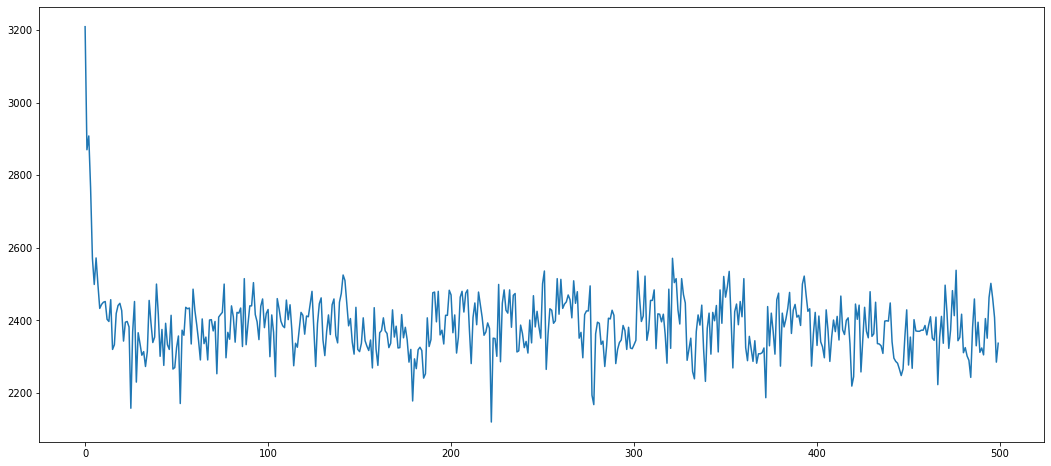

In [ ]:


plt.rcParams["figure.figsize"] = (18,8)
plt.plot(allDistances )
plt.show()

##Final route
get the final best route here by calling getFinalRoute()

In [ ]:
getFinalRoute()

best route is :-- [13, 12, 6, 9, 16, 11, 8, 10, 15, 5, 7, 14, 0, 3, 4, 1, 2] 2120


# using roulettee wheel




In [ ]:
def createGenerations2(pop):
    nexGen = []
    
    popWithFitness = assignFitness_for_Individial(pop) #population dataframe with fitness
    
   
    x =  rouletteeWheelSelection(popWithFitness,50)
    
    x = assignFitness_for_Individial(x)
    matingPool = create_mating_pool(400,x)
    
    childrenAfterCrossOver =  breedPopulation(matingPool)
    childrenAfterMutation =  mutatePopulation(childrenAfterCrossOver)
    
    
    nexGen = childrenAfterMutation
    
    
    return nexGen

In [ ]:

def TSP_by_GA2():
    
    initialPop = createInitialPopulation(800,cityList)
    x = initialPop
    for i in range(500):
        print("gen",i)
        x = createGenerations2(x)
        selectBestRoute(x)
        

In [ ]:
allDistances = []
bestRoutes = [ ]
TSP_by_GA2()



gen 0
[7, 8, 11, 15, 6, 0, 5, 3, 14, 10, 1, 4, 9, 2, 13, 16, 12] 2822
gen 1
[15, 8, 10, 9, 1, 4, 14, 0, 6, 7, 5, 16, 13, 2, 12, 3, 11] 2654
gen 2
[2, 4, 1, 9, 10, 16, 6, 7, 12, 5, 8, 11, 15, 0, 3, 13, 14] 2431
gen 3
[13, 6, 7, 5, 16, 12, 3, 0, 11, 15, 8, 9, 1, 4, 10, 2, 14] 2396
gen 4
[12, 0, 3, 15, 11, 8, 14, 10, 4, 1, 9, 2, 13, 5, 7, 6, 16] 2338
gen 5
[3, 12, 0, 15, 11, 8, 14, 10, 4, 1, 9, 2, 13, 5, 6, 7, 16] 2348
gen 6
[4, 9, 1, 10, 2, 13, 14, 5, 6, 7, 3, 12, 16, 0, 15, 11, 8] 2367
gen 7
[10, 4, 1, 9, 2, 5, 12, 0, 3, 15, 11, 8, 16, 6, 7, 13, 14] 2283
gen 8
[1, 4, 10, 2, 13, 14, 7, 12, 5, 16, 6, 3, 0, 15, 11, 8, 9] 2359
gen 9
[14, 10, 4, 1, 9, 2, 5, 16, 7, 6, 0, 15, 11, 8, 3, 12, 13] 2173
gen 10
[3, 15, 11, 8, 13, 14, 2, 4, 1, 9, 10, 16, 7, 5, 6, 0, 12] 2312
gen 11
[16, 14, 10, 4, 1, 9, 2, 13, 5, 7, 6, 0, 12, 11, 8, 15, 3] 2396
gen 12
[5, 2, 13, 14, 4, 1, 9, 10, 7, 16, 0, 15, 11, 8, 3, 12, 6] 2329
gen 13
[16, 14, 10, 4, 1, 9, 13, 2, 5, 7, 0, 15, 11, 8, 3, 12, 6] 2336
gen 14
[5, 7, 3,

# Final Route

In [ ]:
getFinalRoute()

best route is :-- [12, 6, 13, 8, 5, 7, 4, 10, 11, 0, 15, 14, 1, 2, 16, 3, 9] 2085


# plotting the optimal distance


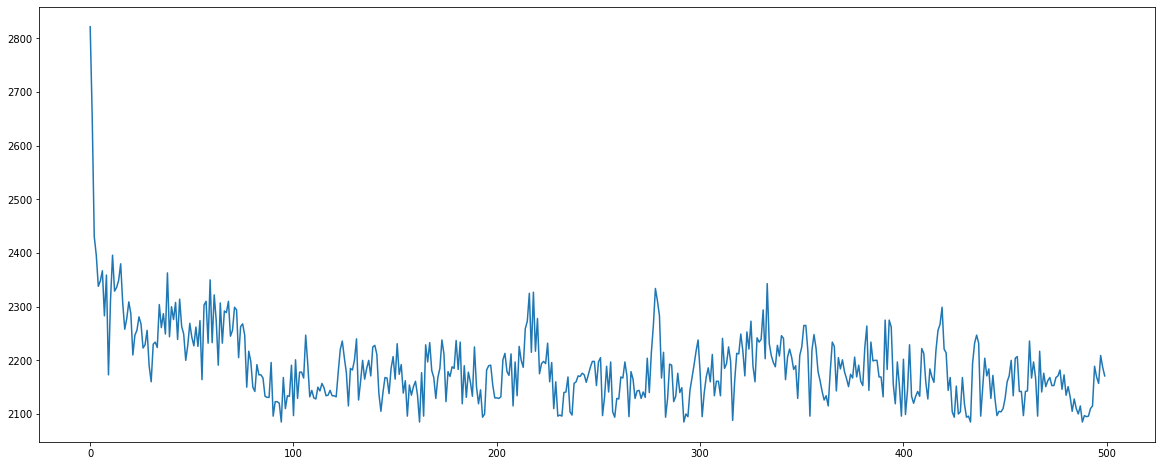

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(allDistances )
plt.show()

In [ ]:
getFinalRoute()

best route is :-- [12, 6, 13, 8, 5, 7, 4, 10, 11, 0, 15, 14, 1, 2, 16, 3, 9] 2085


##Discussion

* to find the final the final solution, i have tried both roulette wheel and tournament selection. Both gave the solution , but after reaching a saturated point, the solution oscillates between set of values.

* by running the code for 500 generations we could achieve the optimal distance, which is 2085. 

* bringing elitism into the population largely affects the time to reach the best solution. If we increase the elite indivdual in breeding population , probability of getting next generation with better fitness score, increases significantly.

* Visualizing the best route in each generation, depits how much there is oscillation, once we reach a saturation level.

 * while visualizing the fitness of each generation, it is quite clear that , we could get stuck in local minima/maxima.

-----

    * Final verdict
    How we encode the initial chromose, significantly,affects the solution approach.
     Elitism plays very important role.



#refrences
* stackoverflow.com

* medium.com